# Tarea 3

## Cargar Datos y verificar

In [2]:
import pandas as pd

penguin_df = pd.read_csv('penguins_size.csv', sep=',')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguin_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguin_df = penguin_df.dropna(inplace=False).reset_index(drop=True)

In [6]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


In [7]:
categorical_features = penguin_df.select_dtypes(include=['object']).columns

for col in categorical_features:
    print(penguin_df[col].value_counts())
    print()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [8]:
# delete row containing a . value in the column sex
penguin_df = penguin_df[penguin_df['sex'] != '.']

## 2) Crear scatter Matrix de variable numericas.

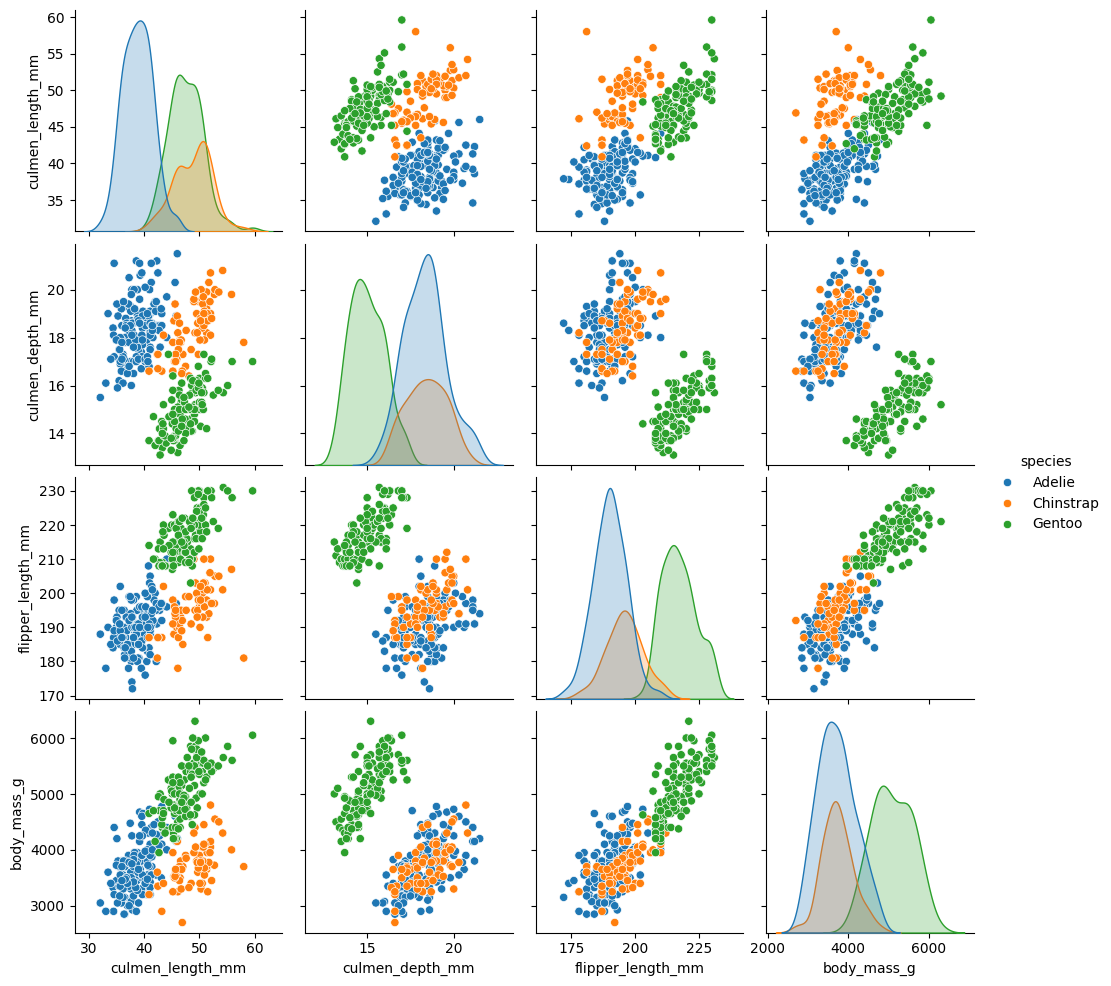

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(penguin_df, hue='species')
plt.show()

## Estandarizar datos

In [10]:
penguin_df_x = penguin_df.drop(columns='species')
penguin_df_y = penguin_df['species']

In [11]:
penguin_df_x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
329,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
categorical_features = penguin_df_x.select_dtypes(include=['object']).columns
numerical_features = penguin_df_x.select_dtypes(include=['int', 'float']).columns

encoded_categorical = pd.get_dummies(penguin_df_x[categorical_features])
penguin_df_x_encoded = pd.concat([encoded_categorical, penguin_df_x[numerical_features]], axis=1)

In [13]:
# normalize numerical data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
penguin_df_x_encoded[numerical_features] = scaler.fit_transform(penguin_df_x_encoded[numerical_features])

In [14]:
penguin_df_x_encoded

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,False,False,True,False,True,0.254545,0.666667,0.152542,0.291667
1,False,False,True,True,False,0.269091,0.511905,0.237288,0.305556
2,False,False,True,True,False,0.298182,0.583333,0.389831,0.152778
3,False,False,True,True,False,0.167273,0.738095,0.355932,0.208333
4,False,False,True,False,True,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...,...,...
329,True,False,False,True,False,0.549091,0.071429,0.711864,0.618056
330,True,False,False,True,False,0.534545,0.142857,0.728814,0.597222
331,True,False,False,False,True,0.665455,0.309524,0.847458,0.847222
332,True,False,False,True,False,0.476364,0.202381,0.677966,0.694444


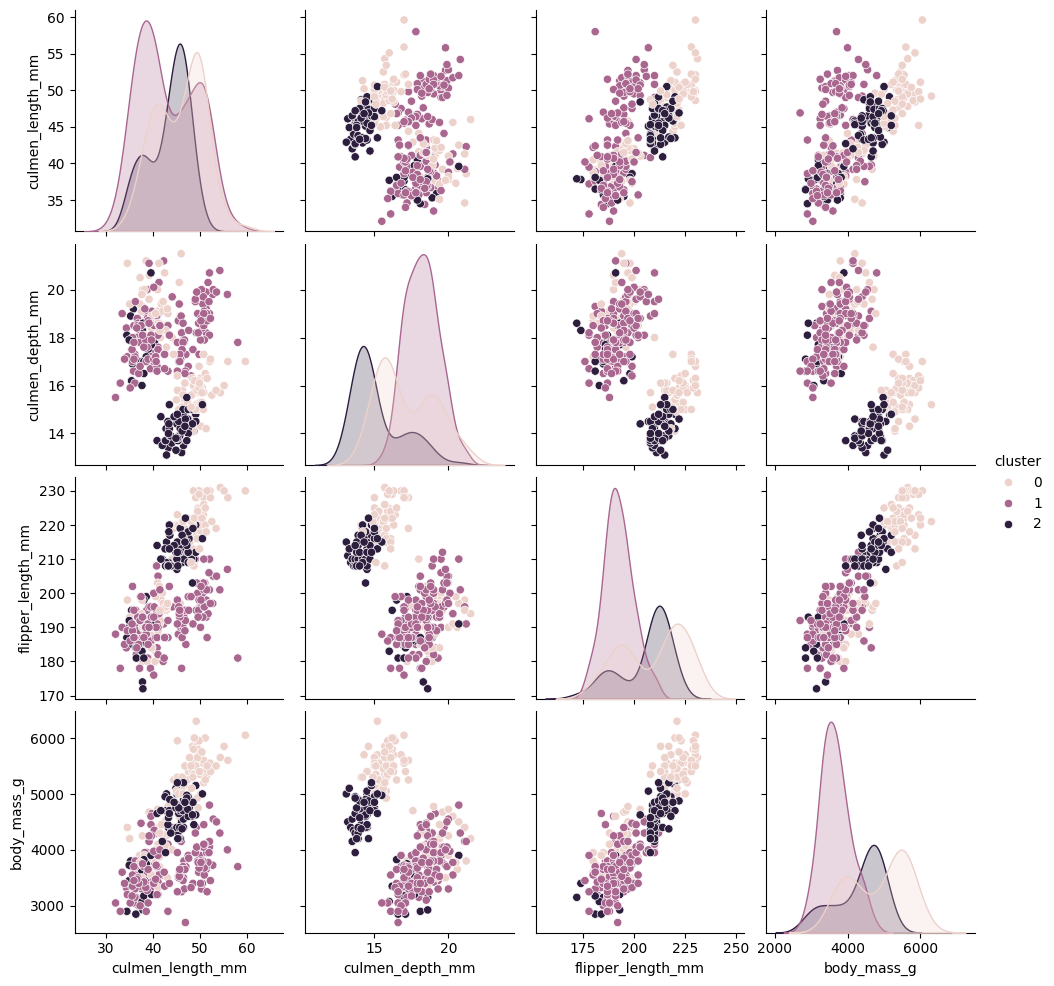

In [15]:
# Gaussian mixture

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=penguin_df_y.nunique())
gmm.fit(penguin_df_x_encoded)
penguin_df['cluster'] = gmm.predict(penguin_df_x_encoded)

sns.pairplot(penguin_df, hue='cluster')
plt.show()

In [16]:
# silhoutte score

from sklearn.metrics import silhouette_score

silhouette_score(penguin_df_x_encoded, penguin_df['cluster'])

0.44356944373543855

## KNN

###  Separe train y test con el numero de especies estratificado (prefiera usar el parámetro stratify de train_test_split en vez de hacerlo a mano) .

In [17]:
## train split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(penguin_df_x_encoded, penguin_df_y, test_size=0.2, random_state=0, stratify=penguin_df_y)

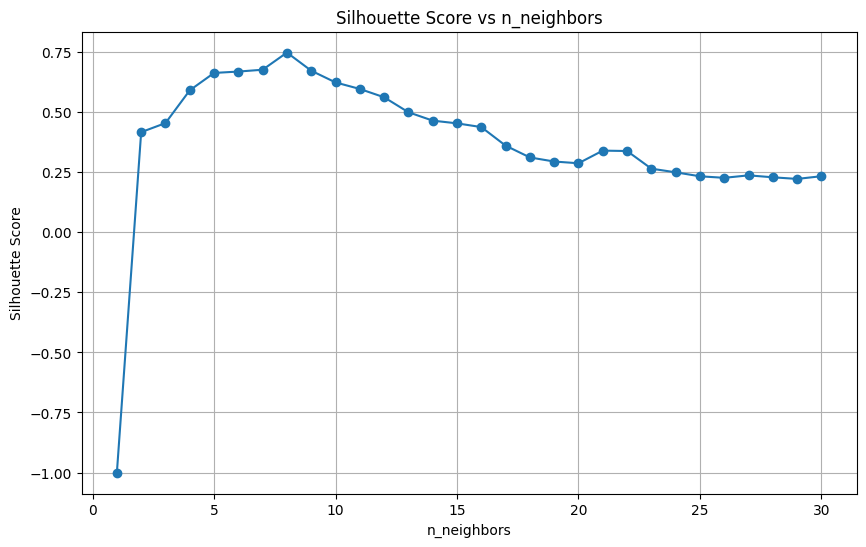

Mejor n_neighbors: 8 con un Silhouette Score de 0.7456403460823154


In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import numpy as np

n_neighbors_range = range(1, 31)
silhouette_scores = []

for n_neighbors in n_neighbors_range:
    kmeans = KMeans(n_clusters=n_neighbors, random_state=0)
    cluster_labels = kmeans.fit_predict(x_train)

    if len(np.unique(cluster_labels)) > 1: 
        score = silhouette_score(x_train, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, silhouette_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs n_neighbors')
plt.grid(True)
plt.show()

best_n_neighbors = n_neighbors_range[np.argmax(silhouette_scores)]
print(f'Mejor n_neighbors: {best_n_neighbors} con un Silhouette Score de {max(silhouette_scores)}')

### Entrene el modelo con el mejor n_neighbors obtenido. Imprima el mejor valor n_neighbors, métrica Sillohuette de los resultados y accuracy del conjunto de test.

In [23]:
knn = KMeans(n_clusters=best_n_neighbors, random_state=0)
kmeans.fit(x_train)

y_pred = kmeans.predict(x_test)
silhouette_score(x_test, y_pred)


0.2211879992087134